In [5]:
import pandas as pd

df = pd.read_csv('sign_mnist_train.csv')
df2 = pd.read_csv('sign_mnist_test.csv')

X_train  = df.drop('label', axis=1)
y_train = df['label']


X_test = df2.drop('label', axis=1)
y_test = df2['label']




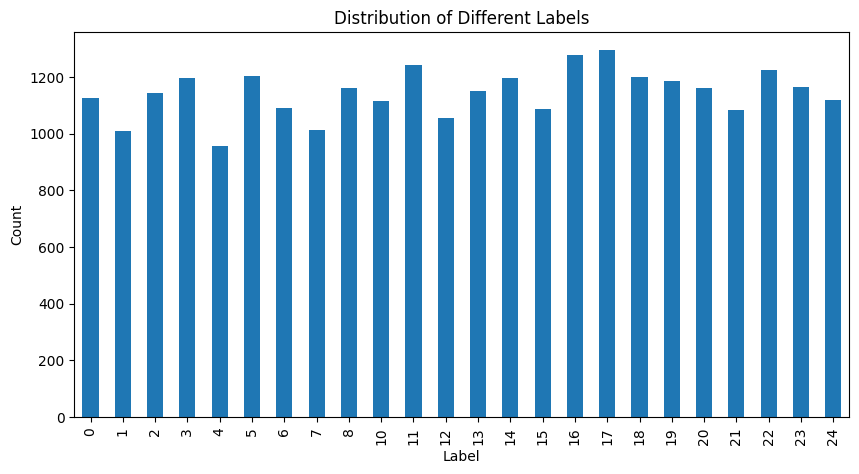

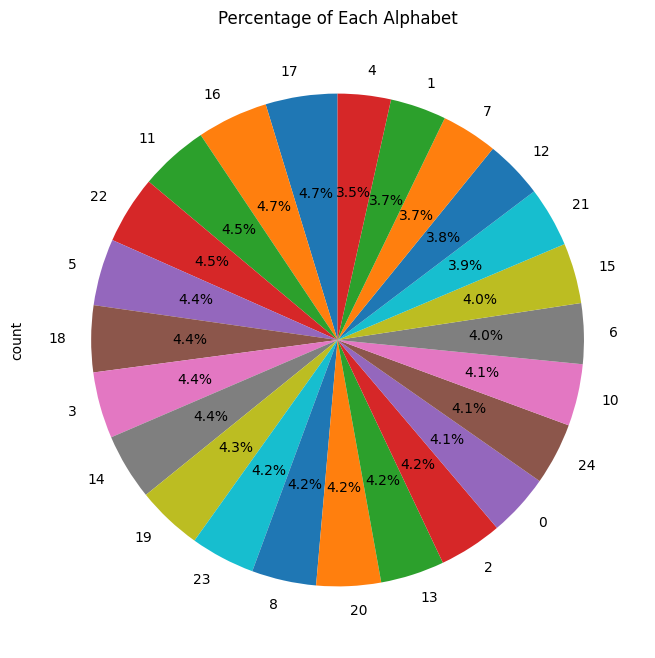

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = df['label']
label_counts = labels.value_counts()
# Bar graph of different labels
plt.figure(figsize=(10, 5))

label_counts.sort_index().plot(kind='bar')
plt.title('Distribution of Different Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Pie chart showing the percentage of each alphabet
plt.figure(figsize=(8, 8))
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Alphabet')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy= 'mean')
imp.fit_transform(X_train)

array([[107., 118., 127., ..., 204., 203., 202.],
       [155., 157., 156., ..., 103., 135., 149.],
       [187., 188., 188., ..., 195., 194., 195.],
       ...,
       [174., 174., 174., ..., 202., 200., 200.],
       [177., 181., 184., ...,  64.,  87.,  93.],
       [179., 180., 180., ..., 205., 209., 215.]])

In [6]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier


k_values = range(1, 20, 2)

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(knn_model, X_train, y_train, cv=kfold, scoring='accuracy')
    avg_score = scores.mean()
    print(f'k={k}, Average Accuracy: {avg_score}')



k=1, Average Accuracy: 0.9994536514296121
k=3, Average Accuracy: 0.9979602986705519
k=5, Average Accuracy: 0.9957020579129484
k=7, Average Accuracy: 0.9938080495356036
k=9, Average Accuracy: 0.9916226552540521
k=11, Average Accuracy: 0.9887087962119832
k=13, Average Accuracy: 0.985066472409397
k=15, Average Accuracy: 0.9834274266982336
k=17, Average Accuracy: 0.9792751775632855
k=19, Average Accuracy: 0.9752321981424149


Fold 1: Accuracy = 99.60%
Fold 2: Accuracy = 99.76%
Fold 3: Accuracy = 99.78%
Fold 4: Accuracy = 99.47%
Fold 5: Accuracy = 99.58%

Mean Accuracy: 99.64%
Accuracy on Test Set: 80.90%


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have X_train and y_train (after imputation and scaling)
# Also, assuming you have df2 as your testing data
X_test = df2.drop('label', axis=1)
y_test = df2['label']

# Impute missing values
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create a KNN model
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model on the entire training set
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.81


In [9]:
from sklearn.model_selection import cross_val_score
k=10
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k)
fold_accuracies = []
for i, cv_score in enumerate(cv_scores):
    fold_accuracies.append(cv_score)
    print(f"Fold {i + 1}: Accuracy = {cv_score:.2f}")

mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")

Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00
Fold 6: Accuracy = 1.00
Fold 7: Accuracy = 1.00
Fold 8: Accuracy = 1.00
Fold 9: Accuracy = 1.00
Fold 10: Accuracy = 1.00
Mean Accuracy: 1.00
Standard Deviation of Accuracy: 0.00


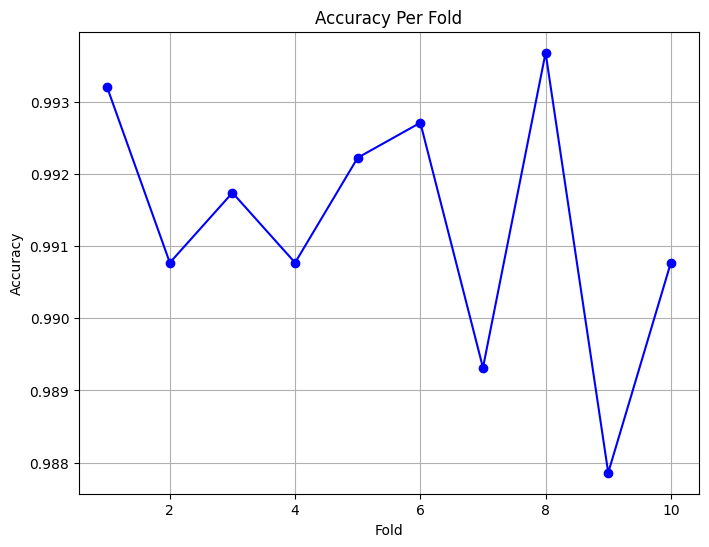

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, k + 1), fold_accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy Per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

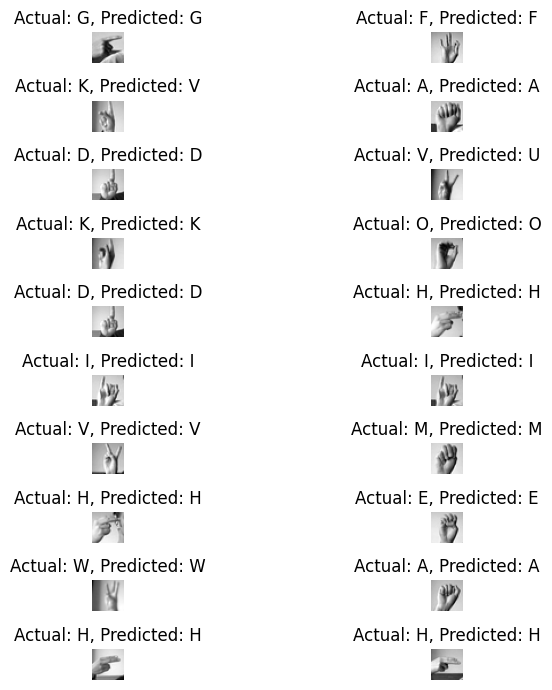

In [12]:
import matplotlib.pyplot as plt
def visualize_test_images(X_test, y_test, y_pred, k=20):
    
    alphabet_mapping = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
        5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
        15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
        20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
    }

    rows = (k + 1) // 2 
    plt.figure(figsize=(10, 7))

    for i in range(k):
        plt.subplot(rows, 2, i + 1)
        plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
        
        actual_label = alphabet_mapping[y_test.iloc[i]]
        predicted_label = alphabet_mapping[y_pred[i]]
        
        plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


visualize_test_images(X_test, y_test, y_pred_test, k=20)



In [13]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=1000) 



model1.fit(X_train_scaled, y_train)

y_pred1 = model1.predict(X_test_scaled)




In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6952035694366983


In [11]:


import joblib

model.fit(X_train_scaled, y_train)


joblib.dump(model, 'knn_model.joblib')




['knn_model.joblib']

In [12]:
loaded_model = joblib.load('knn_model.joblib')

/home/tazmeen/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


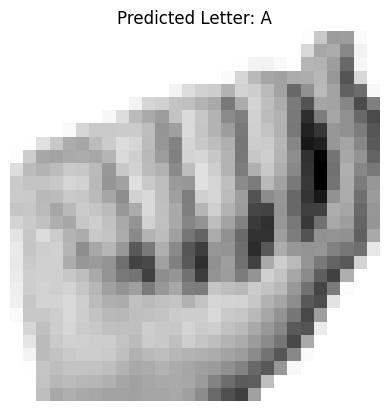

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = Image.open('a2.jpeg').convert('L')

# Resize the image to 28x28
img = img.resize((28, 28))

# Convert the image to a numpy array
img_array = np.array(img)

# Flatten the image to a 1D array
img_flat = img_array.flatten()

# Reshape the flattened image to match the input shape of the model
img_flat = img_flat.reshape(1, -1)

# Scale the image using the same scaler used during training
img_scaled = scaler.transform(img_flat)

# Make predictions on the image
pred = loaded_model.predict(img_scaled)

# Find the index of the highest probability class

predicted_class = np.argmax(pred)

# Decode the predicted class into the actual alphabet
alphabet_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21
    : 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}


pred_letter = alphabet_mapping[predicted_class]
# Display the image
plt.imshow(img_array, cmap='gray')
plt.title(f'Predicted Letter: {pred_letter}')
plt.axis('off')
plt.show()

